## Feather in Focus
Project group 8 <br>
Abhinav Agnihotry 15667766, Brent Brakenhoff 13068989, Jonathan van der Maas 15248844, Shantanu Motiani 13757830 <br>
University of Amsterdam

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import EfficientNetV2S
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2

In [3]:
# load class_names
labels = np.load("class_names.npy", allow_pickle=True).item()

# load attributes
attributes = np.load("attributes.npy")
print(attributes.shape)
attributes_dict = {i + 1: row for i, row in enumerate(attributes)}
# load training data
train_df = pd.read_csv("train_images.csv")
# add attributes to data
train_df["attributes"] = train_df["label"].map(attributes_dict)
train_df.head()

(200, 312)


,image_path,label,attributes
0,/train_images/1.jpg,1,"[0.010638400403539122, 0.010638400403539122, 0..."
1,/train_images/2.jpg,1,"[0.010638400403539122, 0.010638400403539122, 0..."
2,/train_images/3.jpg,1,"[0.010638400403539122, 0.010638400403539122, 0..."
3,/train_images/4.jpg,1,"[0.010638400403539122, 0.010638400403539122, 0..."
4,/train_images/5.jpg,1,"[0.010638400403539122, 0.010638400403539122, 0..."


In [4]:
# Initialize empty lists for images (X) and labels (y)
X = []
y = []

# Iterate over rows in the DataFrame
for _, row in train_df.iterrows():
    # Read the image
    im_path = row['image_path']
    image = cv2.imread(f'train_images{im_path}')
    
    # Resize the image to 300x300
    image_resized = cv2.resize(image, (400, 400))
    
    # Append to the list of images and labels
    X.append(image_resized)

# Convert lists to numpy arrays (optional)
X = np.array(X)
y = train_df['label']

In [5]:
# Convert y to categorical
y_c = to_categorical(y.values-1)
X_train, X_test, y_train, y_test = train_test_split(X, y_c, test_size=0.2, random_state=0)
# use one-hot encoding for labels
print(y_train.shape)

(3140, 200)


In [6]:
# Data augmentation step, however it was not used in the best performing model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    horizontal_flip=True
)

datagen.fit(X_train)

In [7]:
# Initialize the EfficientNetV2 model with default settings
base_model = EfficientNetV2S(
    include_top=False,       # Exclude the classification head
    weights="imagenet",      # Use pre-trained weights from ImageNet
    input_shape=(400, 400, 3)  # Input image size (H, W, C)
)

 tion)                                                                                            
                                                                                                  
 block6a_se_squeeze (Global  (None, 720)                  0         ['block6a_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block6a_se_reshape (Reshap  (None, 1, 1, 720)            0         ['block6a_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block6a_se_reduce (Conv2D)  (None, 1, 1, 30)             21630     ['block6a_se_reshape[0][0]']  
                                                                                                  
 block6a_s

                                                                                                  
 block6c_se_reshape (Reshap  (None, 1, 1, 1248)           0         ['block6c_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block6c_se_reduce (Conv2D)  (None, 1, 1, 52)             64948     ['block6c_se_reshape[0][0]']  
                                                                                                  
 block6c_se_expand (Conv2D)  (None, 1, 1, 1248)           66144     ['block6c_se_reduce[0][0]']   
                                                                                                  
 block6c_se_excite (Multipl  (None, 7, 7, 1248)           0         ['block6c_activation[0][0]',  
 y)                                                                  'block6c_se_expand[0][0]']   
          

 AveragePooling2D)                                                                                
                                                                                                  
 block6e_se_reshape (Reshap  (None, 1, 1, 1248)           0         ['block6e_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block6e_se_reduce (Conv2D)  (None, 1, 1, 52)             64948     ['block6e_se_reshape[0][0]']  
                                                                                                  
 block6e_se_expand (Conv2D)  (None, 1, 1, 1248)           66144     ['block6e_se_reduce[0][0]']   
                                                                                                  
 block6e_se_excite (Multipl  (None, 7, 7, 1248)           0         ['block6e_activation[0][0]',  
 y)       

 block6g_se_squeeze (Global  (None, 1248)                 0         ['block6g_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block6g_se_reshape (Reshap  (None, 1, 1, 1248)           0         ['block6g_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block6g_se_reduce (Conv2D)  (None, 1, 1, 52)             64948     ['block6g_se_reshape[0][0]']  
                                                                                                  
 block6g_se_expand (Conv2D)  (None, 1, 1, 1248)           66144     ['block6g_se_reduce[0][0]']   
                                                                                                  
 block6g_s

                                                                                                  
 block6i_se_squeeze (Global  (None, 1248)                 0         ['block6i_activation[0][0]']  
 AveragePooling2D)                                                                                
                                                                                                  
 block6i_se_reshape (Reshap  (None, 1, 1, 1248)           0         ['block6i_se_squeeze[0][0]']  
 e)                                                                                               
                                                                                                  
 block6i_se_reduce (Conv2D)  (None, 1, 1, 52)             64948     ['block6i_se_reshape[0][0]']  
                                                                                                  
 block6i_se_expand (Conv2D)  (None, 1, 1, 1248)           66144     ['block6i_se_reduce[0][0]']   
          

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Freeze the base model
base_model.trainable = False

# Add a custom classification head
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(200, activation='softmax')
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [9]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Fit the model on the training data for 10 epochs
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=10,
    callbacks=[early_stopping]
)


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Epoch 1/10
99/99 [==============================] - 535s 5s/step - loss: 4.2665 - accuracy: 0.1669 - val_loss: 3.3615 - val_accuracy: 0.2977
Epoch 2/10
99/99 [==============================] - 508s 5s/step - loss: 2.8408 - accuracy: 0.3962 - val_loss: 2.7296 - val_accuracy: 0.3868
Epoch 3/10
99/99 [==============================] - 512s 5s/step - loss: 2.2306 - accuracy: 0.5306 - val_loss: 2.3538 - val_accuracy: 0.4644
Epoch 4/10
99/99 [==============================] - 507s 5s/step - loss: 1.8506 - accuracy: 0.6166 - val_loss: 2.1467 - val_accuracy: 0.4962
Epoch 5/10
99/99 [==============================] - 508s 5s/step - loss: 1.5891 - accuracy: 0.6844 - val_loss: 2.0131 - val_accuracy: 0.5064
Epoch 6/10
99/99 [==============================] - 509s 5s/step - loss: 1.3917 - accuracy: 0.7258 - val_loss: 1.9053 - val_accuracy: 0.5458
Epoch 7/10
99/99 [==============================] - 517s 5s/step - loss: 1.2406 - accuracy: 0.7589 - val_loss: 1.8204 - val_accuracy: 0.5458
Epoch 8/10
99

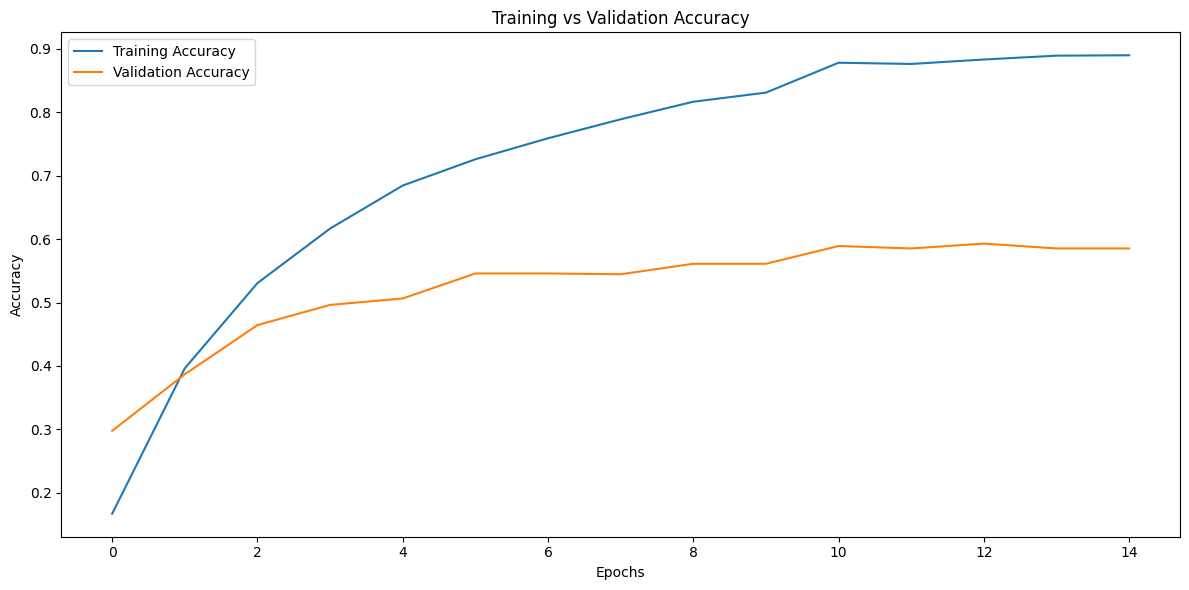

In [15]:
import matplotlib.pyplot as plt

last_5_acc = [0.878025472164154, 0.8761146664619446, 0.8831210136413574, 0.8891719579696655, 0.8898088932037354]
last_5_val = [0.589058518409729, 0.5852417349815369, 0.5928753018379211, 0.5852417349815369, 0.5852417349815369]

def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    hist_acc = history.history["accuracy"] + last_5_acc
    hist_val = history.history["val_accuracy"] + last_5_val
    plt.plot(hist_acc, label="Training Accuracy")
    plt.plot(hist_val, label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training vs Validation Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.savefig("training_history.png", dpi=300)
    plt.show()

plot_training_history(history)

In [11]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight(
    class_weight = 'balanced', 
    classes = np.unique(y), 
    y = y
)

# Convert to a dictionary for the fitting step
class_weight_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weight_dict)

Class Weights: {0: 0.5608571428571428, 1: 0.5608571428571428, 2: 0.5948484848484848, 3: 0.5608571428571428, 4: 1.033157894736842, 5: 1.226875, 6: 0.7010714285714286, 7: 0.8534782608695652, 8: 0.5773529411764706, 9: 0.5773529411764706, 10: 0.5948484848484848, 11: 0.6332258064516129, 12: 0.5948484848484848, 13: 0.5948484848484848, 14: 0.5948484848484848, 15: 0.5948484848484848, 16: 0.6134375, 17: 0.9815, 18: 0.6134375, 19: 0.6134375, 20: 0.6134375, 21: 0.6332258064516129, 22: 0.6134375, 23: 0.727037037037037, 24: 0.6332258064516129, 25: 0.6332258064516129, 26: 0.6332258064516129, 27: 0.6332258064516129, 28: 0.6332258064516129, 29: 0.6332258064516129, 30: 0.6543333333333333, 31: 0.7010714285714286, 32: 0.6543333333333333, 33: 0.6543333333333333, 34: 0.6543333333333333, 35: 0.6543333333333333, 36: 0.6543333333333333, 37: 0.676896551724138, 38: 0.676896551724138, 39: 0.676896551724138, 40: 0.676896551724138, 41: 0.676896551724138, 42: 0.676896551724138, 43: 0.676896551724138, 44: 0.70107142

In [12]:
# Unfreeze the model and recompile with a low learning rate for optimization
for layer in base_model.layers[-20:]:
    layer.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

# Continue training
history_improved = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=5,
    class_weight=class_weight_dict,
    callbacks=[early_stopping]
)

Epoch 1/5
99/99 [==============================] - 489s 5s/step - loss: 0.9612 - accuracy: 0.8280 - val_loss: 1.7124 - val_accuracy: 0.5369
Epoch 2/5
99/99 [==============================] - 511s 5s/step - loss: 0.9652 - accuracy: 0.8287 - val_loss: 1.7092 - val_accuracy: 0.5382
Epoch 3/5
99/99 [==============================] - 511s 5s/step - loss: 0.9528 - accuracy: 0.8408 - val_loss: 1.6924 - val_accuracy: 0.5420
Epoch 4/5
99/99 [==============================] - 512s 5s/step - loss: 0.9557 - accuracy: 0.8404 - val_loss: 1.6913 - val_accuracy: 0.5483
Epoch 5/5
99/99 [==============================] - 509s 5s/step - loss: 0.9473 - accuracy: 0.8354 - val_loss: 1.6961 - val_accuracy: 0.5509


In [ ]:
# Save the model to save time 
model.save("efficientnetv2Final_model.h5")

In [13]:
test_df = pd.read_csv("test_images_path.csv")

test_images = []
# Iterate over rows in the DataFrame
for _, row in test_df.iterrows():
    # Read the image
    im_path = row['image_path']
    image = cv2.imread(f'test_images{im_path}')
    
    # Resize the image to 300x300
    image_resized = cv2.resize(image, (400, 400))
    
    # Append to the list of images and labels
    test_images.append(image_resized)


predictions = model.predict(np.array(test_images))
predicted_labels = np.argmax(predictions, axis = 1)

submission_df = pd.DataFrame({
    'id': test_df['id'],
    'label': predicted_labels + 1
})
submission_df.to_csv('submission.csv', index=False)

125/125 [==============================] - 525s 4s/step
